# Area of the occultor "lens" using the "kite" expression

In this notebook we'll validate the expression for the area of the "lens" of overlap using the expression for the area of the "kite" region.

In [5]:
import numpy as np
import matplotlib.pyplot as pl
%matplotlib notebook

Here is the original expression for the lens area defined in the text:

In [8]:
def ALens(r, b):
    if (1 + r <= b):
        return 0
    elif abs(1 - r) < b and b <= 1 + r:
        term = np.sqrt((4 * b ** 2 - (1 + b ** 2 - r ** 2) ** 2) / 4)
        kappa0 = np.arccos(((r - 1) * (r + 1) + b ** 2) / (2 * b * r))
        kappa1 = np.arccos(((1 - r) * (1 + r) + b ** 2) / (2 * b))
        return r ** 2 * kappa0 + kappa1 - term
    elif b <= 1 - r:
        return np.pi * r ** 2
    elif b <= r - 1:
        return np.pi
    else:
        raise NotImplementedError("Missing case!")

And here is the expression using the area of the "kite", which is much more numerically stable:

In [35]:
def ALensKite(r, b):
    if (1 + r <= b):
        return 0
    elif abs(1 - r) < b and b <= 1 + r:
        C, B, A = sorted([1, r, b])
        Akite = 0.5 * np.sqrt((A + (B + C)) * (C - (A - B)) * (C + (A - B)) * (A + (B - C)))
        kappa0 = np.arctan2(2 * Akite, (r - 1) * (r + 1) + b ** 2)
        kappa1 = np.arctan2(2 * Akite, (1 - r) * (1 + r) + b ** 2)
        return kappa1 + r ** 2 * kappa0 - Akite
    elif b <= 1 - r:
        return np.pi * r ** 2
    elif b <= r - 1:
        return np.pi
    else:
        raise NotImplementedError("Missing case!")

Let's show that the expressions yield the same answer (to within the error of the numerical method) over a large range of $b$ and $r$ values:

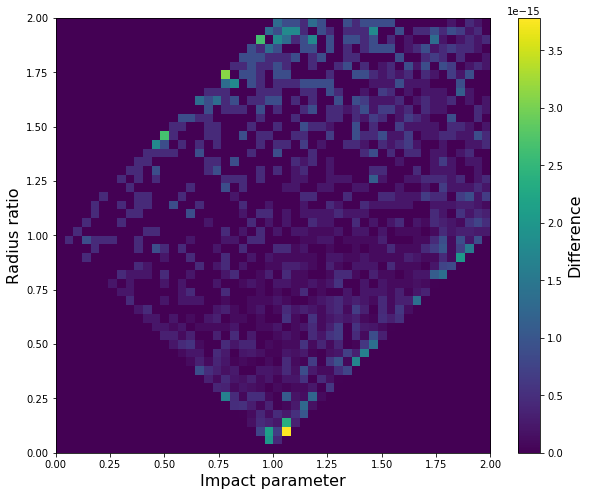

In [36]:
n = 50
barr = np.linspace(0, 2, n)
rarr = np.linspace(0, 2, n)
diff = np.zeros((n, n))
for i, b in enumerate(barr):
    for j, r in enumerate(rarr):
        diff[j, i] = abs(ALens(r, b) - ALensKite(r, b))

fig = pl.figure(figsize=(10, 8))
pl.imshow(diff, origin="lower", extent=(0, 2, 0, 2))
pl.xlabel("Impact parameter", fontsize=16)
pl.ylabel("Radius ratio", fontsize=16)
cb = pl.colorbar()
cb.ax.set_ylabel("Difference", fontsize=16);

The difference is close to machine epsilon everywhere, so our expression is correct. Near certain singular points/lines, this expression is a lot more stable, as we will see later!